## Predictive Insights Project


## Question 4

I employed a two way ANOVA to test the effects of different teaching approaches on student outcomes. The experiment was designed as a complete block randomised design where we are blocking for students' background knowledge in the subject and randomising within those blocks. I conducted the ANOVA to examine the effects of the teaching approach and the students' background subject knowledge on their outcomes and to understand if there is an interaction between those variables.

The results from the ANOVA show that the different teaching approachs have no significant effect on the student outcomes. The results also show that there is no significant interaction between the teaching approaches and students' background subject knowledge, indicating that the effect of one factor does not depend on the level of the other. The only variable that has a significant effect on the student outcomes is the sub_group variable that splits the student according to their background subject knowledge. 

Upon further analysis of the sub_group variable, it is evident from the results of a t-test that the mean student outcome of students with no background in the subject is significantly lower than the mean of students with some background subject knowledge. But by measuring the size of the effect using Cohen's d we can see that the difference between the two groups of students is small, even though it is statistically significant.

Below is the process I followed to explore, clean and test the data.

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

df = pd.read_csv('test_data.csv')

## EDA

In [46]:
#EDA
print('Value')
print(df['value'].describe())
print(df['test'].value_counts())
print(df['sub_group'].value_counts())
print('Missing values')
missing_values = df.isna().sum()
print(missing_values)

Value
count    10000.000000
mean         0.378955
std          1.207209
min         -4.862072
25%         -0.424023
50%          0.361637
75%          1.137128
max          5.596341
Name: value, dtype: float64
test
B    5071
A    4929
Name: count, dtype: int64
sub_group
1    5033
2    4967
Name: count, dtype: int64
Missing values
Unnamed: 0    0
value         0
test          0
sub_group     0
dtype: int64


## Normality Assumption

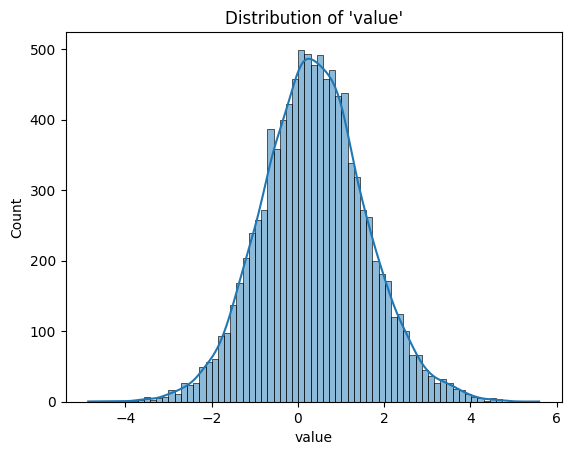

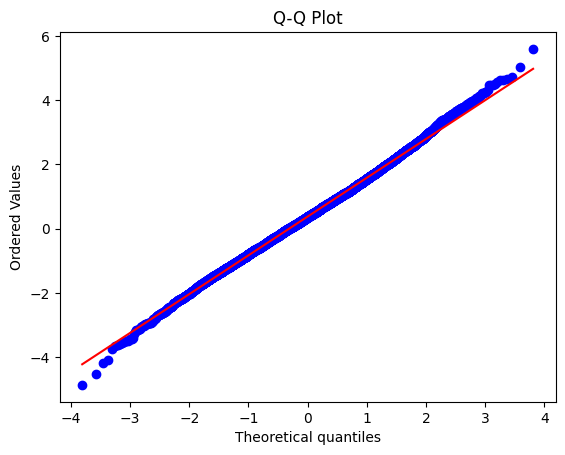

In [28]:
# Histogram and Q-Q plot to check for normality in 'value'

# Histogram
sns.histplot(df['value'], kde=True)
plt.title("Distribution of 'value'")
plt.show()

# Q-Q plot
stats.probplot(df['value'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## Homogeneity of Variances

In [30]:
# Testing Homogeneity of Variances

# Group by 'test' and 'sub_group', and get the values
grouped = df.groupby(['test', 'sub_group'])['value'].apply(list)

# Extract values for each group
groups = [group for group in grouped]

# Perform Levene's test
stat, p_value = levene(*groups)

# Print the result
print(f'Levene’s test statistic: {stat}')
print(f'Levene’s test p-value: {p_value}')

# explain tests weakness
# how to interpret test stat

Levene’s test statistic: 188.35497664051053
Levene’s test p-value: 8.077634871369877e-119


## Independence of Variables

complete block randomized design

## Comfounding Variables?

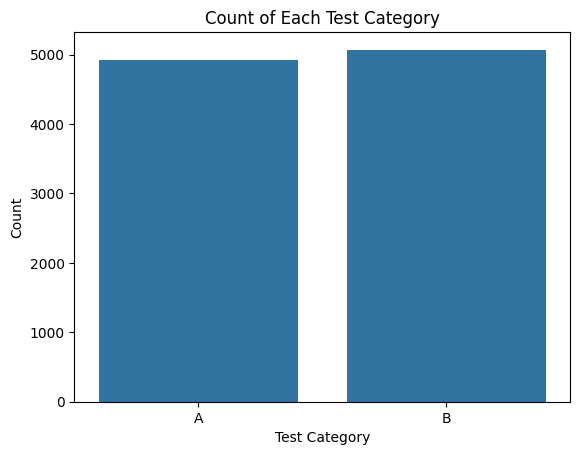

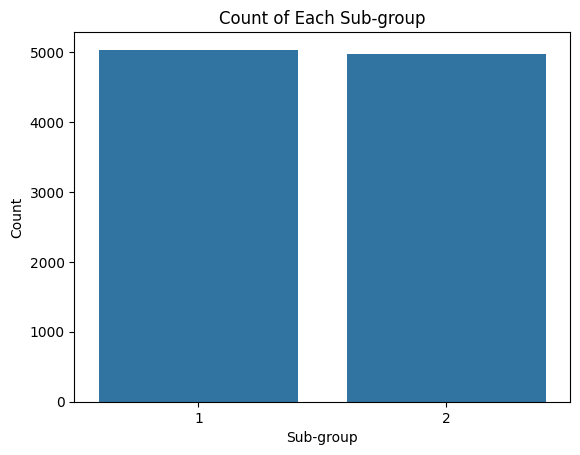

In [31]:
# plotting the indepenent variables

# Bar graph for the 'test' variable
sns.countplot(x='test', data=df)
plt.title('Count of Each Test Category')
plt.xlabel('Test Category')
plt.ylabel('Count')
plt.show()

# Bar graph for the 'sub_group' variable
sns.countplot(x='sub_group', data=df)
plt.title('Count of Each Sub-group')
plt.xlabel('Sub-group')
plt.ylabel('Count')
plt.show()

# Interpreting ANOVA results

In [35]:
# cleaning data and performing ANOVA

df['test'] = df['test'].astype(str)
df['sub_group'] = df['sub_group'].astype(str)

# Defining the model
model = ols('value ~ C(test) * C(sub_group)', data = df).fit()

# performing the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df           F        PR(>F)
C(test)                   1.653319     1.0    1.145806  2.844547e-01
C(sub_group)            147.386938     1.0  102.144123  6.723923e-24
C(test):C(sub_group)      0.029055     1.0    0.020136  8.871613e-01
Residual              14423.539900  9996.0         NaN           NaN


## Sub Group effect

               mean       std
sub_group                    
1          0.258570  1.020855
2          0.500939  1.359706


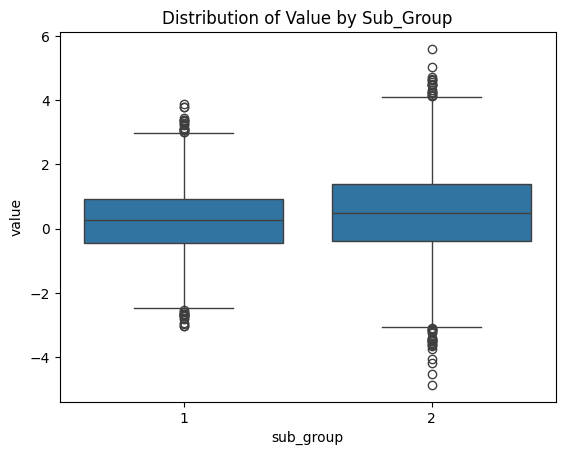

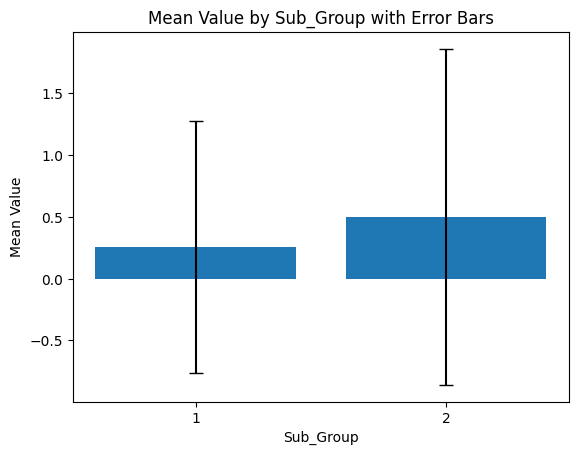

In [36]:
# investigating the sub_group effect

# Group by 'sub_group' and calculate mean and standard deviation
group_stats = df.groupby('sub_group')['value'].agg(['mean', 'std'])
print(group_stats)

# Boxplot
sns.boxplot(x='sub_group', y='value', data=df)
plt.title('Distribution of Value by Sub_Group')
plt.show()

# Bar plot with error bars
mean_values = df.groupby('sub_group')['value'].mean()
std_values = df.groupby('sub_group')['value'].std()

plt.bar(mean_values.index, mean_values, yerr=std_values, capsize=5)
plt.xlabel('Sub_Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Sub_Group with Error Bars')
plt.show()

In [37]:
from scipy.stats import ttest_ind

# Split data based on 'sub_group'
group1 = df[df['sub_group'] == '1']['value']
group2 = df[df['sub_group'] == '2']['value']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -10.088632824662046, P-value: 8.063283186297229e-24


In [38]:
import numpy as np

# Calculate effect size (Cohen's d)
mean_diff = np.mean(group1) - np.mean(group2)
pooled_std = np.sqrt(((len(group1) - 1) * np.std(group1, ddof=1) ** 2 + (len(group2) - 1) * np.std(group2, ddof=1) ** 2) / (len(group1) + len(group2) - 2))
cohen_d = mean_diff / pooled_std
print(f'Cohen\'s d: {cohen_d}')

Cohen's d: -0.20177705124527645
